# Mosaics Notebook

In [ ]:
def polygon_enumeration(n, m):
    if m <= 1: return 0
    elif m == 2:
        M = matrix(QQ, 
            [
                [1,1],
                [1,1],
            ]
        )
    elif m >= 3:
        M = matrix(QQ, 
            [
                [1,1,1,1],
                [1,1,0,1],
                [1,0,1,1],
                [1,1,1,1],
            ]
        )

        for _ in range(m-3):
            row_nums = M.nrows()
            half_row_nums = row_nums//2
            col_nums = M.ncols()
            half_col_nums = col_nums//2

            M_1 = matrix([[M[i][j] for j in range(half_col_nums)] for i in range(half_row_nums)])
            M_2 = matrix([[M[i][j] for j in range(half_col_nums, col_nums)] for i in range(half_row_nums)])
            M_3 = matrix([[M[i][j] for j in range(half_col_nums)] for i in range(half_row_nums, row_nums)])
            M_4 = matrix([[M[i][j] for j in range(half_col_nums, col_nums)] for i in range(half_row_nums, row_nums)])

            M = block_matrix(
                [
                    [M_1, M_2, M_1, M_2],
                    [M_3, M_4, 0*M_3, M_4],
                    [M_1, 0*M_2, M_1, M_2],
                    [M_3, M_4, M_3, M_4]
                ]
            )
        print(M)

    val = (M[0] * M**(n-2) * M[:,0])[0]
    return val

def messy_polygon_enumeration(n, m, b=7):
    if m <= 1: return 0
    # define matrix  M
    elif m == 2:
        M = matrix(QQ, 
            [
                [b**2,1],
                [-1,1],
            ]
        )
    
    elif m >= 3:
        M = matrix(QQ, 
            [
                [b**3,b,b,1],
                [-b,b,0,1],
                [-b,0,b,1],
                [-1,1,1,b],
            ]
        )

        for _ in range(m-3):

            row_nums = M.nrows()
            half_row_nums = row_nums//2
            col_nums = M.ncols()
            half_col_nums = col_nums//2

            M_1 = matrix([[M[i][j] for j in range(half_col_nums)] for i in range(half_row_nums)])
            M_2 = matrix([[M[i][j] for j in range(half_col_nums, col_nums)] for i in range(half_row_nums)])
            M_3 = matrix([[M[i][j] for j in range(half_col_nums)] for i in range(half_row_nums, row_nums)])
            M_4 = matrix([[M[i][j] for j in range(half_col_nums, col_nums)] for i in range(half_row_nums, row_nums)])

            M = block_matrix(
                [
                    [b*M_1, b*M_2, M_1/b, M_2],
                    [b*M_3, b*M_4, 0*M_3, M_4],
                    [-1*M_1/b, 0*M_2, M_1/b, M_2],
                    [M_3, M_4, -1*M_3, b*M_4]
                ]
            )

    print(f'A({m}) = ')
    print(M)

    val = (M[0] * M**(n-2) * M[:,0])[0]
    return val

for n in range(2, 9):
    m = n
    val = polygon_enumeration(n=n, m=m)
    print(f't_{n},{m} = {val}')
    # val = messy_polygon_enumeration(n=n, m=m, b=6)
    # print(f't_({n},{m}) = {val}')
    # print(f'6^({n}*{m}) - t_({n},{m}) = {6**(n*m) - val}')
    # print(f'p_({n},{m}) = {(val / 6**(n*m)).n()}')


In [ ]:
# just for fun

def a(n):
    if n == 0: return 0
    return 2*(a(n-1) + b(n-1))

def b(n):
    if n == 0: return 0
    return 2*a(n-1) + b(n-1) + 2**(n)


for n in range(0, 7):
    val = a(n) + b(n)
    print(f'(a + b)({n}) = {val}')


In [ ]:
def a(n):
    if n < 2: return 0 # check that the solution you eventually find for a,b,c,d includes this 
    if n == 2: return 36
    return 6 * a(n-1) + 6 * b(n-1)


def b(n):
    if n < 2: return 0
    if n == 2: return 0
    return 6 * b(n-1) + 6 * d(n-1)


def c(n):
    if n < 2: return 0
    if n == 2: return 0
    return 6 * c(n-1) + 6 * b(n-1)

def d(n):
    if n < 2: return 0
    if n == 2: return 1
    return 6 * d(n-1) + (1/3) * b(n-1)

def f(n):
    return 2*a(n) + 4 * b(n) + 2*c(n) + d(n)

def T_3(n):
    if n < 2: return 0
    if n == 2: return 73
    sum = 0
    for i in range(2,n-1):
        sum += (6**(3*(n-i)) - T_3(n-i)) * (2*a(i)+4*b(i)+2*c(i)+d(i))
    return 216*T_3(n-1) + sum + 216*(2*a(n-1)+4*b(n-1)+2*c(n-1)+d(n-1)) + (2*a(n)+4*b(n)+2*c(n)+d(n))

In [ ]:
import numpy as np

def L_2(w):
    b = (36**(w-2))*np.array([[1],[1]])
    # b = np.array([[1],[1]])
    m = np.array(
        [
            [36, 1],
            [-1, 1]
        ]
    )
    if w == 2: return b
    return np.dot(m, L_2(w-1)) + b

def L_3(w):
    b = (216**(w-2))*np.array([[73],[37], [37], [18]])
    # b = np.array([[1],[1]])
    m = np.array(
        [
            [216, 6, 6, 1],
            [-6, 6, 0, 1],
            [-6, 0, 6, 1],
            [-1, 1, 1, 6]
        ]
    )
    if w == 2: return b
    return np.dot(m, L_3(w-1)) + b

for w in range(2,8):
    print(f'L_2({w}) = {L_2(w)}')
    # print(f'L_3({w}) = {L_3(w)}')


In [ ]:

def t(n):
    if n <= 1: return 0
    elif n == 2: return 1
    elif n > 2:
        val = 36*t(n-1)
        for i in range(2,n+1):
            val += (6**(2*(n-i)) - t(n-i))
        return val

for n in range(2,8):
    print(f't({n}) = {t(n)}')


In [ ]:
# TODO main diagonal

main_diag = [1, 31998, 20334816290, 365320963733070828]

for i in range(len(main_diag)-2):
    print(f'{(main_diag[i+2]*main_diag[i]/(main_diag[i+1]**2))**(1/2)}')


In [4]:
# make A matrix for specific weights 
def make_A_from_weights(weights: dict):
    A = matrix(QQ, 
        [
            [weights[1]*weights[1],weights[2]*weights[5]],
            [weights[3]*weights[9],weights[4]*weights[13]],
        ]
    )

    return A

# make V matrix for specific weights 
def make_V_from_weights(weights: dict):
    V = matrix(QQ, 
        [
            [weights[1],weights[2]*weights[5]/weights[1],weights[1],weights[6]],
            [weights[3]*weights[9]/weights[1],weights[4]*weights[13]/weights[1],weights[3]*weights[10]/weights[2],weights[4]*weights[14]/weights[2]],
            [weights[1],weights[2]*weights[7]/weights[3],weights[1],weights[2]*weights[8]/weights[4]],
            [weights[11],weights[4]*weights[15]/weights[3],weights[3]*weights[12]/weights[4],weights[16]],
        ]
    )

    # print(f'V = {V}')

    return V

# make larger A using V
def make_new_A(A, V):
    row_nums = A.nrows()
    half_row_nums = row_nums//2
    col_nums = A.ncols()
    half_col_nums = col_nums//2
    # read A as block matrix
    A_00 = matrix([[A[i][j] for j in range(half_col_nums)] for i in range(half_row_nums)])
    A_01 = matrix([[A[i][j] for j in range(half_col_nums, col_nums)] for i in range(half_row_nums)])
    A_10 = matrix([[A[i][j] for j in range(half_col_nums)] for i in range(half_row_nums, row_nums)])
    A_11 = matrix([[A[i][j] for j in range(half_col_nums, col_nums)] for i in range(half_row_nums, row_nums)])
    # construct new A
    A = block_matrix(
        [
            [V[0][0]*A_00, V[0][1]*A_00, V[0][2]*A_01, V[0][3]*A_01],
            [V[1][0]*A_00, V[1][1]*A_00, V[1][2]*A_01, V[1][3]*A_01],
            [V[2][0]*A_10, V[2][1]*A_10, V[2][2]*A_11, V[2][3]*A_11],
            [V[3][0]*A_10, V[3][1]*A_10, V[3][2]*A_11, V[3][3]*A_11]
        ]
    )
    # print(A)
    return A

# general mosaic enumeration 
def mosaic_enumeration_from_weights(weights:dict, n: int, m: int):
    if m <= 1: return weights[1]**(n*m)
    # define starter 2x2 matrix A
    A = make_A_from_weights(weights=weights)
    # define coefficient matrix V
    V = make_V_from_weights(weights=weights)


    # recursively construct A(m)
    for _ in range(m-2):
        A = make_new_A(A=A, V=V)
        # print(f'{_} :: {max(A.eigenvalues())/11**(_+3)}')
    # print(f'A= \n{A}')

    return (A**(n))[0][0]

In [5]:
from time import time

# messy knot weights
weights = {1: 11, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: -4, 8: 1, 9: -1, 10: 4, 11: 1, 12: 1, 13: 1, 14: 1, 15: -1, 16: 11}

# clean knot weights
# weights = {1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 4, 8: 1, 9: 1, 10: 4, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1}

# messy polygon weights
# weights = {1: 7, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 0, 8: 1, 9: -1, 10: 0, 11: 1, 12: 1, 13: 1, 14: 1, 15: -1, 16: 7}

# clean polygon weights
# weights = {1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 0, 8: 1, 9: 1, 10: 0, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1}


# main diaganol
for n in range(1,5):
    start = time()
    val = mosaic_enumeration_from_weights(weights = weights, n = n, m = n)
    print(f'{n} :: {val}')
    # prob = (1 - val/weights[1]**(n*n)).n()
    # print(f'Probability of a polygon mosaics in {n} by {n} grid: {prob:.6f}. Completed in {time()-start:.4f}s')
    # print(11**(n*n) - val)


1 :: 11
2 :: 14640
3 :: 2357297140
4 :: 45921093560197600


In [6]:
# 6 tiles weights
weights = {1: 6, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 0, 8: 1, 9: -1, 10: 0, 11: 1, 12: 1, 13: 1, 14: 1, 15: -1, 16: 6}
to_plot = []
for n in range(1,12):
    start = time()
    num_non_polygon_mosaics = mosaic_enumeration_from_weights(weights = weights, n = n, m = n)
    prob = (1 - num_non_polygon_mosaics/weights[1]**(n*n)).n()
    # print(f'Probability of a polygon mosaics in {n} by {n} grid: {prob:.6f}. Completed in {time()-start:.4f}s')
    print(f'({n}, {prob:.6f}),', end=' ')
    to_plot.append((n, prob))
    # print(11**(n*n) - num_non_polygon_mosaics)


(1, 0.000000), (2, 0.000772), (3, 0.003175), (4, 0.007208), (5, 0.012853), (6, 0.020086), (7, 0.028874), (8, 0.039179), (9, 0.050953), (10, 0.064145), (11, 0.078694), 

In [9]:
[(data[0]+1, log(data[1])**(1/2)) for data in to_plot]

[(2, +infinity),
 (3, 1.63927081110834e-16 + 2.67713239809170*I),
 (4, 1.46860716216489e-16 + 2.39841750811318*I),
 (5, 1.35993031660001e-16 + 2.22093475040615*I),
 (6, 1.27771252727470e-16 + 2.08666291074993*I),
 (7, 1.21044045593513e-16 + 1.97679928086675*I),
 (8, 1.15286120183514e-16 + 1.88276522281822*I),
 (9, 1.10211720177787e-16 + 1.79989398175083*I),
 (10, 1.05647417019537e-16 + 1.72535325439291*I),
 (11, 1.01479734287481e-16 + 1.65728983014752*I),
 (12, 9.76302230783746e-17 + 1.59442254119879*I)]

Text(0, 0.5, 'Root of probability of SAP')

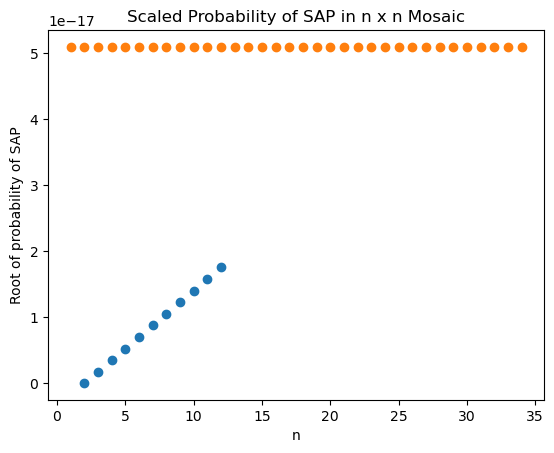

In [8]:
import matplotlib.pyplot as plt
# import sklearn 

plt.scatter([data[0]+1 for data in to_plot], [log(1-data[1])**(1/2) for data in to_plot])
plt.scatter([i for i in range(1, 35)], [log(1-0.5)**(1/2) for _ in range(1,35)])
# plt.scatter([i for i in range(1, 35)], [0.02814*(i-1)-0.02779 for i in range(1,35)])
plt.title(f'Scaled Probability of SAP in n x n Mosaic')
plt.xlabel(f'n')
plt.ylabel(f'Root of probability of SAP')

In [ ]:
from weights import get_solutions

solution_set = get_solutions()

unique_As = []
unique_Vs = []

for sol_num, sol in enumerate(solution_set):
    sol_string = f'{sol_num+1} :: {sol}'
    # for num in sol:
    #     thing += str(num) + ' & '
    # thing += ' \\\\'
    print(sol_string)

    # print(f'[w_1 ... w_16] & = & {[6] +sol[1:-1] + [6]} \\\\')

    # A = make_A_from_weights(weights=[0]+sol)
    # if A not in unique_As: unique_As.append(A)
    # V = make_V_from_weights(weights=[0]+sol)
    # if V not in unique_Vs: unique_Vs.append(V)

# print(len(solution_set))
# print(len(unique_As))
# print(len(unique_Vs))

# for A_mat in unique_As:
#     print(A_mat)
#     print()


# for V_mat in unique_Vs:
#     print(V_mat)
#     print()




In [ ]:
# generate and simplify constraints

from weights import special_cases, base_to_list, identify_weights

# define variables
var_names = [f'w_{i+1}' for i in range(16)]
R = PolynomialRing(QQ, var_names) # QQ is the field of rational numbers
locals().update(R.gens_dict()) # This makes 'a', 'b', etc. available as variables

weight_map = {
    (0,0,0,0): w_1,
    (0,0,0,1): w_2,
    (0,0,1,0): w_3,
    (0,0,1,1): w_4,
    (0,1,0,0): w_5,
    (0,1,0,1): w_6,
    (0,1,1,0): w_7,
    (0,1,1,1): w_8,
    (1,0,0,0): w_9,
    (1,0,0,1): w_10,
    (1,0,1,0): w_11,
    (1,0,1,1): w_12,
    (1,1,0,0): w_13,
    (1,1,0,1): w_14,
    (1,1,1,0): w_15,
    (1,1,1,1): w_16,
}

# 2. Define the Ideal
equations = []

# smallest saps constraint 
equations.append(w_2*w_3*w_5*w_9+1)
equations.append(w_15*w_14*w_12*w_8+1)

# if we assign weights to 
equations.append(w_1 - 1)
equations.append(w_16 - 1)

equations.append(w_2 - 1)
equations.append(w_3 - 1)
equations.append(w_5 - 1)
equations.append(w_9 + 1)

# equations.append(w_4 - 1)
# equations.append(w_8 - 1)
# equations.append(w_11 - 1)
# equations.append(w_13 - 1)


# # Add the variable constraints: x^3 - x = 0 for each variable
for var_name in var_names:
    v = R.gen(R.variable_names().index(var_name)) # Get the actual variable object
    equations.append(v^3 - v)

# generate constraints and add to ideal
for val in range(2**8):
    v1, v2, v3, v4, v6, v7, v8, v9 = base_to_list(value=val, length=8, base=2)
    vertices = [v1,v2,v3,v4,v6,v7,v8,v9]
    # if vertices aren't the two special cases
    if vertices not in [[0,0,0,0,0,0,0,0], [1,1,1,1,1,1,1,1]]:
        weights_left = [weight_map[(v1,v2,v4,0)], weight_map[(v2,v3,0,v6)], weight_map[(v4,0,v7,v8)], weight_map[(0,v6,v8,v9)]]
        weights_right = [weight_map[(v1,v2,v4,1)], weight_map[(v2,v3,1,v6)], weight_map[(v4,1,v7,v8)], weight_map[(1,v6,v8,v9)]]

        prod_left = 1
        for variable in weights_left: prod_left *= variable
        prod_right = 1
        for variable in weights_right: prod_right *= variable

        if vertices in special_cases: 
            prod_right *= -1

        equations.append(prod_left - prod_right)


# Create the ideal
I = R.ideal(equations)

# 3. Compute a Gröbner Basis
# This is the core simplification step.
# It will transform your system into a 'simpler' equivalent system.
# Different term orders can yield different bases, but they describe the same set of zeroes.
G = I.groebner_basis()

print("Gröbner Basis:")
for poly in G:
    print(f'{poly},')

# Interpretation:
# The Gröbner basis G represents an equivalent system of equations
# that has the same solutions as your original system.
# The basis can reveal simplified relationships directly.
# For instance, if 'a' appears in G, it might be a single variable polynomial, e.g., 'a', 'a-1', 'a+1'.
# This directly tells you the possible values for 'a'.
# If you get 'a*b', it means 'a*b=0', so either a=0 or b=0.
# If you get 'a-b', it means 'a=b'.
# If the basis contains '1', it means there are no solutions.

In [ ]:
w_1 = 1
w_2 = 1
w_3 = 1
w_4 = 1
w_5 = 1
w_6 = 1
w_7 = -1
w_8 = 1
w_9 = -1
w_10 = 1
w_11 = 1
w_12 = 1
w_13 = 1
w_14 = 1
w_15 = -1
w_16 = 1

basis = [
    w_2*w_13*w_15 + w_10*w_11*w_16,
    w_2*w_3 + w_14*w_15,
    w_2*w_5 + w_12*w_15,
    w_3*w_5 - w_10*w_16,
    w_2*w_8 - w_9*w_15,
    w_3*w_8 + w_5*w_15,
    w_5*w_8 + w_3*w_15,
    w_2*w_9 + w_10*w_16,
    w_3*w_9 - w_12*w_15,
    w_5*w_9 - w_14*w_15,
    w_8*w_9 - w_2*w_15,
    w_2*w_10 + w_9*w_16,
    w_3*w_10 - w_5*w_16,
    w_5*w_10 - w_3*w_16,
    w_8*w_10 + w_15*w_16,
    w_9*w_10 + w_2*w_16,
    w_2*w_11 - w_8*w_13,
    w_3*w_11 - w_12*w_13,
    w_5*w_11 - w_13*w_14,
    w_8*w_11 - w_2*w_13,
    w_9*w_11 - w_13*w_15,
    w_2*w_12 + w_5*w_15,
    w_3*w_12 - w_9*w_15,
    w_5*w_12 + w_2*w_15,
    w_8*w_12 + w_14*w_15,
    w_9*w_12 - w_3*w_15,
    w_10*w_12 - w_14*w_16,
    w_11*w_12 - w_3*w_13,
    w_5*w_13 - w_11*w_14,
    w_9*w_13 - w_11*w_15,
    w_11*w_13 - w_9*w_15,
    w_2*w_14 + w_3*w_15,
    w_3*w_14 + w_2*w_15,
    w_5*w_14 - w_9*w_15,
    w_8*w_14 + w_12*w_15,
    w_9*w_14 - w_5*w_15,
    w_10*w_14 - w_12*w_16,
    w_12*w_14 - w_10*w_16,
    w_8*w_15 + w_10*w_16,
    w_10*w_15 + w_8*w_16,
    w_1 - w_16,
    w_2^2 - 1,
    w_3^2 - 1,
    w_4 - w_13,
    w_5^2 - 1,
    w_6 - w_11,
    w_7 + w_10,
    w_8^2 - 1,
    w_9^2 - 1,
    w_10^2 - 1,
    w_11^2 - 1,
    w_12^2 - 1,
    w_13^2 - 1,
    w_14^2 - 1,
    w_15^2 - 1,
    w_16^2 - 1,
]

for poly_check in basis:
    if poly_check != 0:
        print(poly_check)
